In [1]:
# Importing the dataset from keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(a_train, b_train), (a_test, b_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# Checking the ‘type’
print(type(a_train))
print(type(a_test))
print(type(b_train))
print(type(b_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
# Checking the shape
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

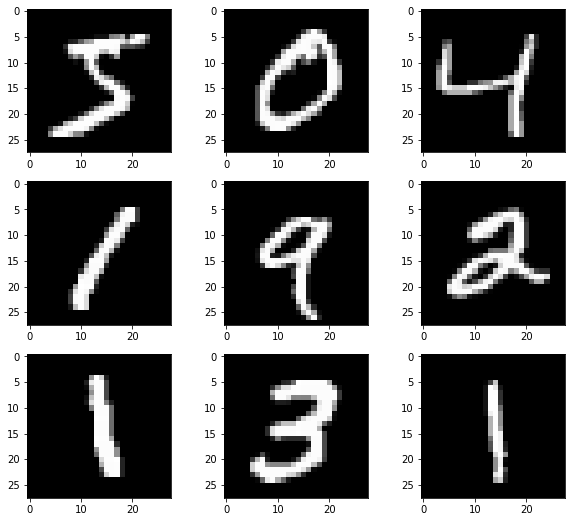

In [4]:
plt.gray() 
plt.figure(figsize = (10,9))

for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(a_train[i])

In [5]:

for i in range(5):
  print(b_train[i])

5
0
4
1
9


In [6]:

print(a_train.min())
print(a_train.max())

0
255


In [7]:

a_train = a_train.astype(np.float32) 
a_test = a_test.astype(np.float32)

a_train = a_train/255.0
a_test = a_test/255.0

In [8]:

print(a_train.min())
print(a_train.max())
a_train.shape


0.0
1.0


(60000, 28, 28)

In [9]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(b_test))

kmeans = MiniBatchKMeans(n_clusters = total_clusters)

nsamples, na, nb = a_train.shape
a_train = a_train.reshape((nsamples,na*nb))
kmeans.fit(a_train)

MiniBatchKMeans(n_clusters=10)

In [10]:
kmeans.labels_


array([2, 3, 0, ..., 2, 8, 6], dtype=int32)

In [11]:
def retrieve_info(cluster_labels,b_train):
 

  reference_labels = {}
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(b_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [12]:
reference_labels = retrieve_info(kmeans.labels_,b_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [13]:

print(number_labels[:20].astype(int))
print(b_train[:20])

[3 0 4 1 9 9 1 3 1 9 3 1 3 6 1 9 8 9 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [14]:

from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,b_train))

0.5363833333333333


Task 1: Run the above code by solving all issues

Task 2: Optimize the code to improve the accuracy using given tutorial

Task 3: Try to run the code by using differnet dataset(Other than digits)